In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import datetime
import mlccd_models
import os
import mlccd_diffusion

# deactivate GPU on ragnarok
# tf.config.set_visible_devices([], "GPU")

2024-10-20 18:26:22.139087: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-20 18:26:22.363511: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 18:26:22.440675: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 18:26:22.464179: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 18:26:22.641401: I tensorflow/core/platform/cpu_feature_guar

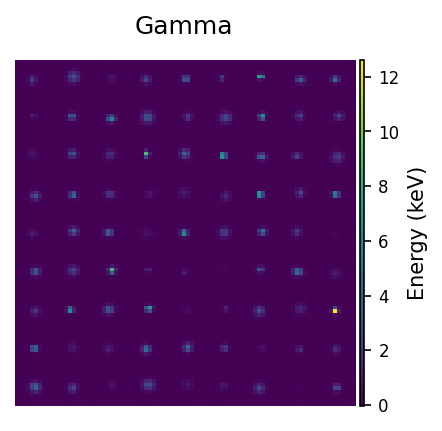

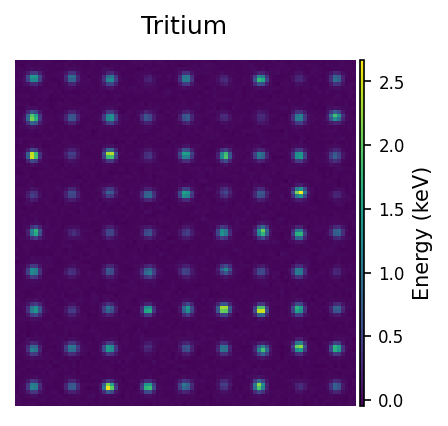

In [2]:
# Load the training and test data
data_tritium = mlccd_models.CCDData(
    # os.path.expanduser("~/repos/mlccd_geant4_sim/Geant4_CCD_simulation/output/diffused_H3_5000000.h5"),
    # os.path.expanduser("~/data/CCD_data/Simulated_training_clusters/2024-10-01-tritium-and-gamma-100keV-more-metadata/diffused_H3_5000000.h5"),
    os.path.expanduser("~/data/CCD_data/Simulated_training_clusters/2024-10-17-tritium-and-gamma-100keV-more-realistic-diffusion/tritium_10_17_add_classical_disc.h5"),
    image_unit="keV"
)
data_gamma = mlccd_models.CCDData(
    # os.path.expanduser("~/repos/mlccd_geant4_sim/Geant4_CCD_simulation/output/diffused_gamma_20000000.h5"),
    # os.path.expanduser("~/data/CCD_data/Simulated_training_clusters/2024-10-01-tritium-and-gamma-100keV-more-metadata/diffused_gamma_20000000.h5"),
    os.path.expanduser("~/data/CCD_data/Simulated_training_clusters/2024-10-17-tritium-and-gamma-100keV-more-realistic-diffusion/gamma_10_17_add_classical_disc.h5"),
    image_unit="keV"
)
data_gamma.plot(title="Gamma", num_plots=81)
data_tritium.plot(title="Tritium", num_plots=81)

In [3]:
import umap
from sklearn.preprocessing import StandardScaler

num_events = 20000
# Reshape the data
X1 = data_tritium.images.reshape(data_tritium.images.shape[0], -1)[:num_events]
X2 = data_gamma.images.reshape(data_gamma.images.shape[0], -1)[:num_events]
X = np.concatenate((X1, X2), axis=0)
X.shape

(40000, 100)

In [106]:

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X_scaled)


/home/emil/miniconda3/envs/mlccd/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


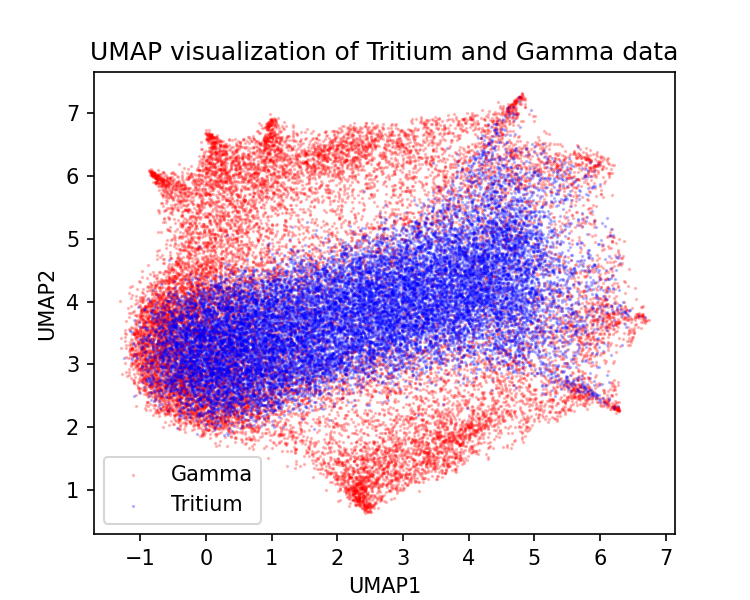

In [110]:
# Visualize the result
plt.figure(figsize=(5,4), dpi=150)
plt.scatter(embedding[len(X1):, 0], embedding[len(X1):, 1], s=0.4, alpha=0.25, c='red', label='Gamma')
plt.scatter(embedding[:len(X1), 0], embedding[:len(X1), 1], s=0.4, alpha=0.25, c='blue', label='Tritium')
plt.title('UMAP visualization of Tritium and Gamma data')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.show()

In [108]:
import seaborn as sns

# Visualize the result with seaborn contour 2D histogram plots
plt.figure(figsize=(5, 4), dpi=150)

# Plot Gamma data
sns.kdeplot(
    x=embedding[len(X1):, 0],
    y=embedding[len(X1):, 1],
    cmap="Reds",
    fill=True,
    cbar=True,
    alpha=0.7,
    levels=20,
    label='Gamma'
)

# Plot Tritium data
sns.kdeplot(
    x=embedding[:len(X1), 0],
    y=embedding[:len(X1), 1],
    cmap="Blues",
    fill=True,
    cbar=True,
    alpha=0.7,
    levels=20,
    label='Tritium'
)

plt.title('UMAP visualization of Tritium and Gamma data')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.show()

/tmp/ipykernel_3779/3265622474.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Assuming X1 is tritium data and X2 is gamma data, as in your previous code
num_events = 20000
X1 = data_tritium.images.reshape(data_tritium.images.shape[0], -1)[:num_events]
X2 = data_gamma.images.reshape(data_gamma.images.shape[0], -1)[:num_events]
X = np.concatenate((X1, X2), axis=0)

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
embedding = tsne.fit_transform(X_scaled)


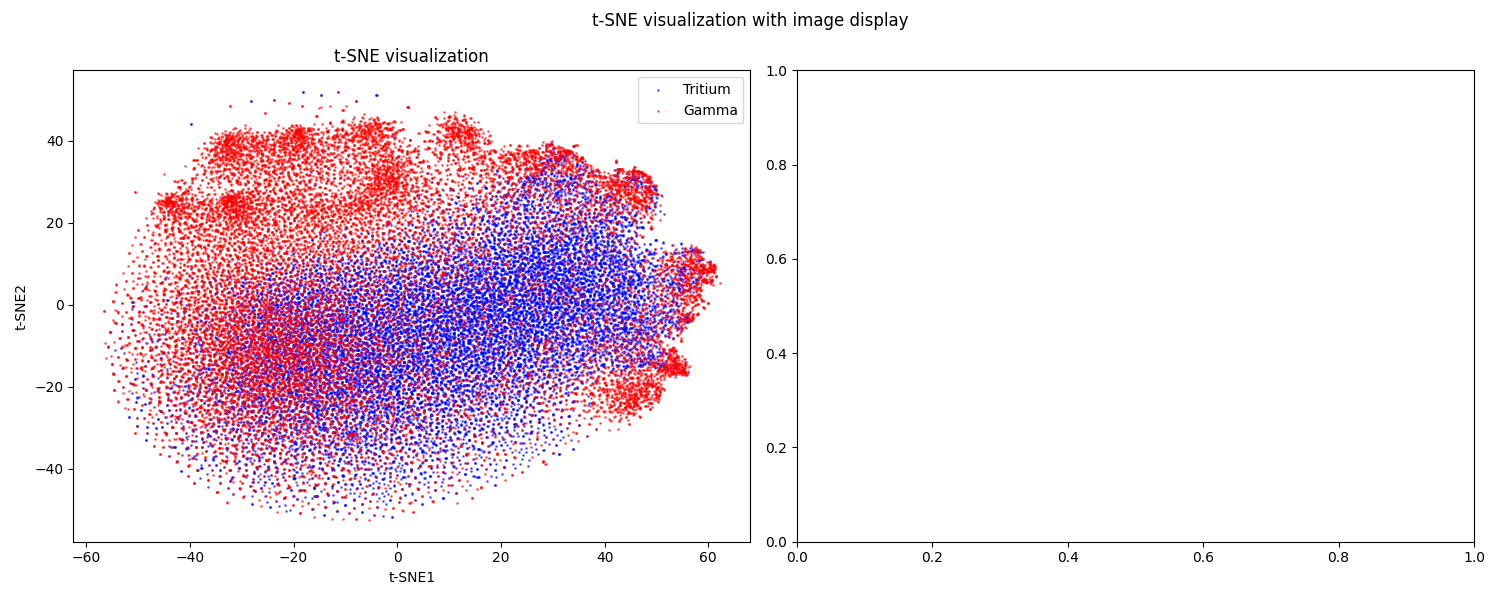

In [79]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
%matplotlib widget

# Create the main figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('t-SNE visualization with image display')

# Plot t-SNE results
scatter = ax1.scatter(embedding[:len(X1), 0], embedding[:len(X1), 1], s=1, alpha=0.5, c='blue', label='Tritium')
ax1.scatter(embedding[len(X1):, 0], embedding[len(X1):, 1], s=1, alpha=0.5, c='red', label='Gamma')
ax1.set_title('t-SNE visualization')
ax1.set_xlabel('t-SNE1')
ax1.set_ylabel('t-SNE2')
ax1.legend()

# Function to handle mouse click events
def on_click(event):
    if event.inaxes == ax1:
        # Find the nearest point to the click
        dist = np.sum((embedding - [event.xdata, event.ydata])**2, axis=1)
        index = np.argmin(dist)
        
        # Clear the right subplot and display the corresponding image
        ax2.clear()
        if index < len(X1):
            image = X1[index].reshape(10, 10)
            title = 'Tritium'
        else:
            image = X2[index - len(X1)].reshape(10, 10)
            title = 'Gamma'
        ax2.imshow(image, cmap='viridis')
        ax2.set_title(f'{title} Image')
        ax2.axis('off')
        fig.canvas.draw_idle()

# Connect the click event to the figure
fig.canvas.mpl_connect('button_press_event', on_click)

plt.tight_layout()
plt.show()

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import cKDTree
%matplotlib widget

# Create the main figure
fig = plt.figure(figsize=(8, 4), dpi=100)

# Create three subfigures
subfigs = fig.subfigures(1, 3, width_ratios=[2.2, 1, 1])

# Create axes for t-SNE plot in the first subfigure
ax1 = subfigs[0].add_subplot(111)

# Create grids of subplots for images in the second and third subfigures
tritium_axs = subfigs[1].subplots(5, 3, subplot_kw={'xticks': [], 'yticks': []})
gamma_axs = subfigs[2].subplots(5, 3, subplot_kw={'xticks': [], 'yticks': []})

# Plot t-SNE results
scatter = ax1.scatter(embedding[:len(X1), 0], embedding[:len(X1), 1], s=1, alpha=0.5, c='blue', label='Tritium')
ax1.scatter(embedding[len(X1):, 0], embedding[len(X1):, 1], s=1, alpha=0.5, c='red', label='Gamma')
ax1.set_title('t-SNE visualization')
ax1.set_xlabel('t-SNE1')
ax1.set_ylabel('t-SNE2')
ax1.legend()

# Create KD-Trees for efficient nearest neighbor search
tree_tritium = cKDTree(embedding[:len(X1)])
tree_gamma = cKDTree(embedding[len(X1):])

def plot_grid(images, axs, subfig):
    num_rows, num_cols = 5, 3
    vmin = np.min(images)
    vmax = np.max(images)

    for i in range(num_rows):
        for j in range(num_cols):
            idx = i * num_cols + j
            ax = axs[i, j]
            if idx < len(images):
                ax.imshow(images[idx], aspect="equal", vmin=vmin, vmax=vmax, cmap='viridis')
            ax.axis("off")
    
    # Adjust spacing between subplots
    subfig.subplots_adjust(wspace=0, hspace=0)

# Function to handle mouse click events
def on_click(event):
    if event.inaxes == ax1:
        click_point = np.array([event.xdata, event.ydata])
        
        # Find the 15 nearest neighbors for each class
        _, indices_tritium = tree_tritium.query(click_point, k=15)
        _, indices_gamma = tree_gamma.query(click_point, k=15)
        
        # Prepare images for plotting
        tritium_images = X1[indices_tritium].reshape(-1, 10, 10)
        gamma_images = X2[indices_gamma].reshape(-1, 10, 10)
        
        # Clear the subplots and plot new images
        for ax in tritium_axs.flatten():
            ax.clear()
            ax.axis('off')
        for ax in gamma_axs.flatten():
            ax.clear()
            ax.axis('off')
        
        plot_grid(tritium_images, tritium_axs, subfigs[1])
        plot_grid(gamma_images, gamma_axs, subfigs[2])
        
        subfigs[1].suptitle('Tritium')
        subfigs[2].suptitle('Gamma')
        
        fig.canvas.draw_idle()

# Connect the click event to the figure
fig.canvas.mpl_connect('button_press_event', on_click)

# Adjust layout
plt.tight_layout()
plt.show()